In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [91]:
train_data = 'dataset/train.csv'

test_data = 'dataset/test.csv'

In [92]:
train_df = pd.read_csv(train_data)

test_df = pd.read_csv(test_data)

在有监督学习的问题中，选择恰当的特征集非常关键，因为它直接影响到模型的性能。以下是选择特征集时需要考虑的一些步骤和技巧：

1. **业务理解和领域知识**：首先了解问题背景，确定哪些特征在逻辑上或基于领域知识可能与目标变量有关。

2. **数据探索**：
   - 统计分析：计算特征与目标变量之间的相关性。
   - 数据可视化：绘制箱线图、散点图、直方图等，观察特征与目标之间的关系。

3. **特征工程**：
   - **特征构造**：基于现有特征创建新的特征。例如，从日期中提取出年份、月份或者季度等。
   - **特征转换**：对原始数据进行某种数学变换，如对数、平方根等。
   - **编码**：将类别特征转换为数值形式，如使用独热编码（one-hot encoding）。

4. **特征选择**：有很多方法可以帮助我们选择最有影响力的特征：
   - **过滤方法**（Filter Methods）：基于统计学的方法选择特征，如皮尔逊相关系数、卡方检验等。
   - **包裹方法**（Wrapper Methods）：例如递归特征消除（RFE）。
   - **嵌入方法**（Embedded Methods）：这些方法在模型训练过程中选择特征，如Lasso回归或基于树的方法（决策树、随机森林等）。

5. **特征缩放**：对特征进行归一化或标准化，以确保所有特征在相同的尺度上。

6. **检查多重共线性**：多重共线性是指两个或多个特征之间存在高度相关性。这可能会影响到某些模型（如线性回归）的性能。可以使用方差膨胀因子（VIF）来检测。

7. **特征重要性**：对于基于树的模型（如决策树、随机森林、XGBoost等），可以直接得到每个特征的重要性评分。

8. **交叉验证**：在特征选择后，通过交叉验证来评估模型的性能，确保没有过拟合，并且选定的特征集确实可以提高模型的表现。

9. **持续迭代和试验**：特征选择是一个迭代的过程，可能需要多次尝试和调整来找到最佳的特征组合。

10. **避免数据泄露**：确保在特征工程和特征选择的过程中，不会使用到测试集的数据，以避免信息泄露。

最后，需要注意的是，特征选择的目标不仅仅是提高模型的准确性，还要确保模型的可解释性、泛化能力和效率。

In [93]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

In [94]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [95]:
train_df.shape, test_df.shape

((3000, 23), (4398, 22))

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [112]:
print([x for x in train_df.columns if x not in test_df.columns])
print([x for x in test_df.columns if x not in train_df.columns])



['revenue', 'status_encoded']
['homepage', 'imdb_id', 'poster_path']


In [99]:
# 统计每个数据集中的null值
train_nulls = train_df.isnull().sum()
test_nulls = test_df.isnull().sum()

# 并排合并统计结果
result = pd.concat([train_nulls, test_nulls], axis=1, keys=['Train Nulls', 'Test Nulls'])
print(result)

                       Train Nulls  Test Nulls
id                               0         0.0
belongs_to_collection         2396      3521.0
budget                           0         0.0
genres                           7        16.0
homepage                      2054      2978.0
imdb_id                          0         0.0
original_language                0         0.0
original_title                   0         0.0
overview                         8        14.0
popularity                       0         0.0
poster_path                      1         1.0
production_companies           156       258.0
production_countries            55       102.0
release_date                     0         1.0
runtime                          2         4.0
spoken_languages                20        42.0
status                           0         2.0
tagline                        597       863.0
title                            0         3.0
Keywords                       276       393.0
cast         

In [100]:
#数据清洗
#用median代替runtime中的null
train_df['runtime'].fillna(train_df['runtime'].median(), inplace=True)


# 对于分类数据和文本，使用"unknown"填充
columns_fill_unknown = ['belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
                        'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date',
                        'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']

for col in columns_fill_unknown:
    train_df[col].fillna('unkown', inplace=True)


#transfer status as one—hot encoding
train_df['status_encoded'] = train_df['status'].apply(lambda x: 1 if x == 'Released' else 0)

#剔除模型中的无关特征
columns_to_drop = ['homepage', 'imdb_id', 'poster_path']
train_df = train_df.drop(columns=columns_to_drop)


In [109]:
train_df.columns.values

array(['id', 'belongs_to_collection', 'budget', 'genres',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'Keywords', 'cast', 'crew', 'revenue', 'status_encoded'],
      dtype=object)

In [101]:
#检验
train_nulls = train_df.isnull().sum()
train_nulls



id                       0
belongs_to_collection    0
budget                   0
genres                   0
original_language        0
original_title           0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
Keywords                 0
cast                     0
crew                     0
revenue                  0
status_encoded           0
dtype: int64

In [102]:
train_df.describe()

,id,budget,popularity,runtime,revenue,status_encoded
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.854000,6.672585e+07,0.998667
std,866.169729,3.702609e+07,12.104000,22.079293,1.375323e+08,0.036497
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,1.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,1.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,1.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,1.000000


In [103]:
train_df.describe(include=['O'])

,belongs_to_collection,genres,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
count,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,423,873,36,2975,2993,2384,322,2398,402,2,2401,2969,2649,2976,2985
top,unkown,"[{'id': 18, 'name': 'Drama'}]",en,Joshua,unkown,unkown,"[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,unkown,The Magnificent Seven,unkown,[],unkown
freq,2396,266,2575,2,8,156,1752,5,1817,2996,597,2,276,13,16


In [117]:
import ast
import matplotlib.pyplot as plt
from collections import Counter

def generate_distribution_chart(dataframe, column_name, title, xlabel, ylabel, key_name='name'):
    """
    Generate a distribution bar chart based on the given dataframe and column.

    Parameters:
    - dataframe: Input DataFrame
    - column_name: Column from which data is to be extracted and plotted
    - title: Title of the plot
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - key_name: Key from which data is to be extracted (default is 'name')
    """
    
    def extract_values(data_str):
        try:
            return [data_dict[key_name] for data_dict in ast.literal_eval(data_str)]
        except:
            return []

    all_values = [value for sublist in dataframe[column_name].dropna().apply(extract_values) for value in sublist]
    value_count = Counter(all_values)
    sorted_value_count = sorted(value_count.items(), key=lambda x: x[1], reverse=True)

    values, counts = zip(*sorted_value_count)

    plt.figure(figsize=(12, 8))
    bars = plt.bar(values, counts, color='skyblue')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, height + 5, str(height), ha='center', va='bottom')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


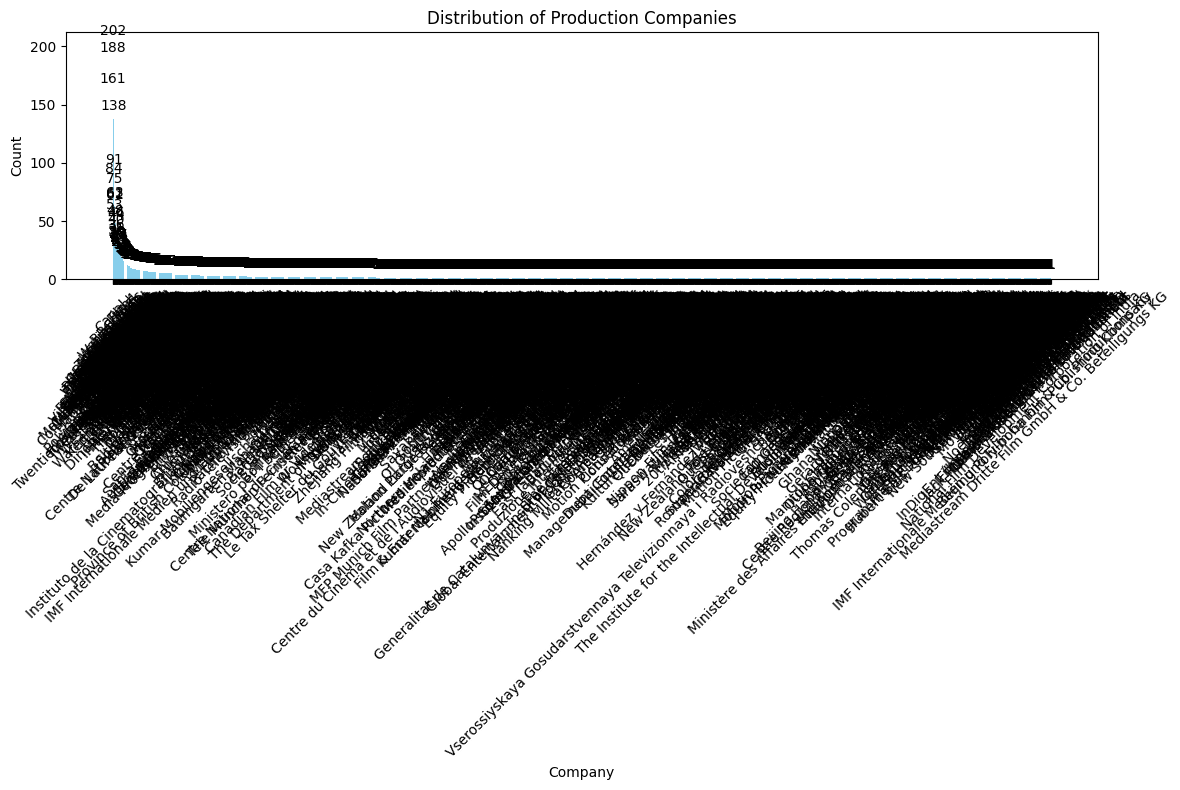

In [120]:
generate_distribution_chart(train_df, 'production_companies', 'Distribution of Production Companies', 'Company', 'Count')


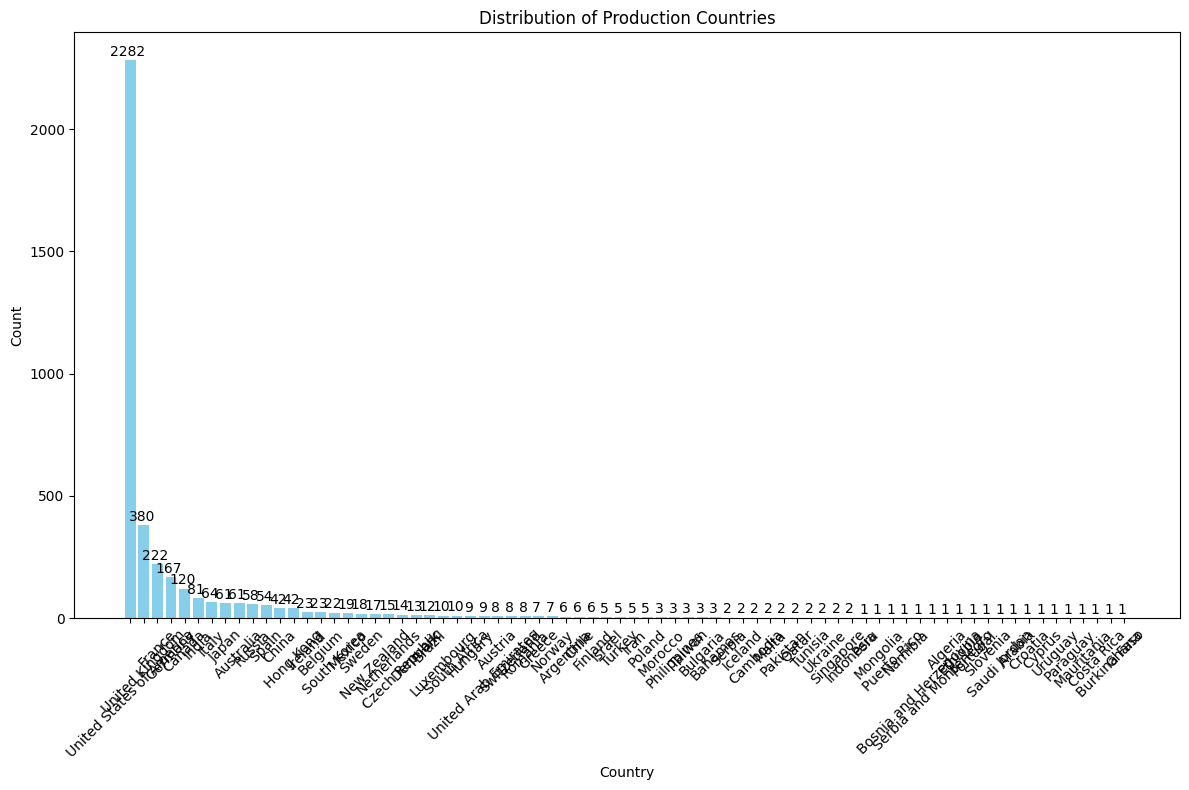

In [119]:
generate_distribution_chart(train_df, 'production_countries', 'Distribution of Production Countries', 'Country', 'Count')

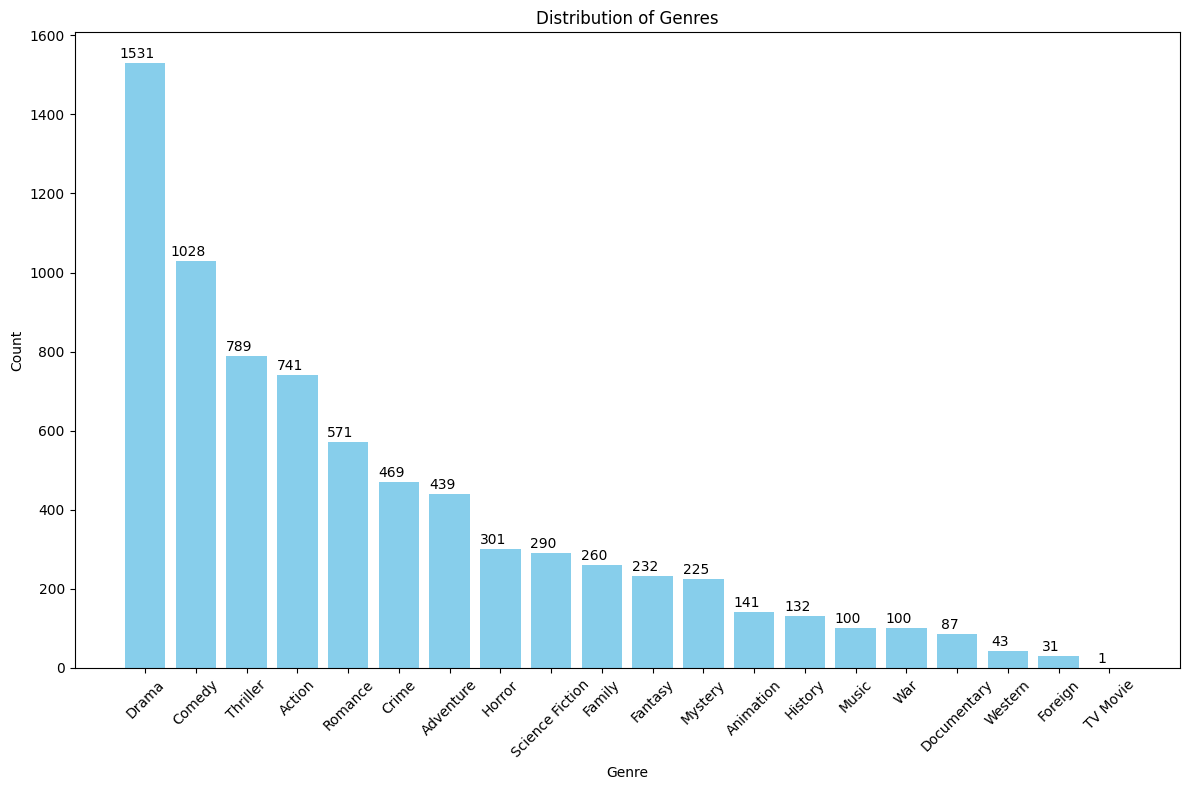

In [118]:
generate_distribution_chart(train_df, 'genres', 'Distribution of Genres', 'Genre', 'Count')

In [121]:
def extract_values(data_str):
    try:
        names = [data_dict['name'] for data_dict in ast.literal_eval(data_str)]
        return ', '.join(names)
    except:
        return ''

# 应用函数并将结果存储在新的列 'genres_names' 中
train_df['genres_names'] = train_df['genres'].apply(extract_values)


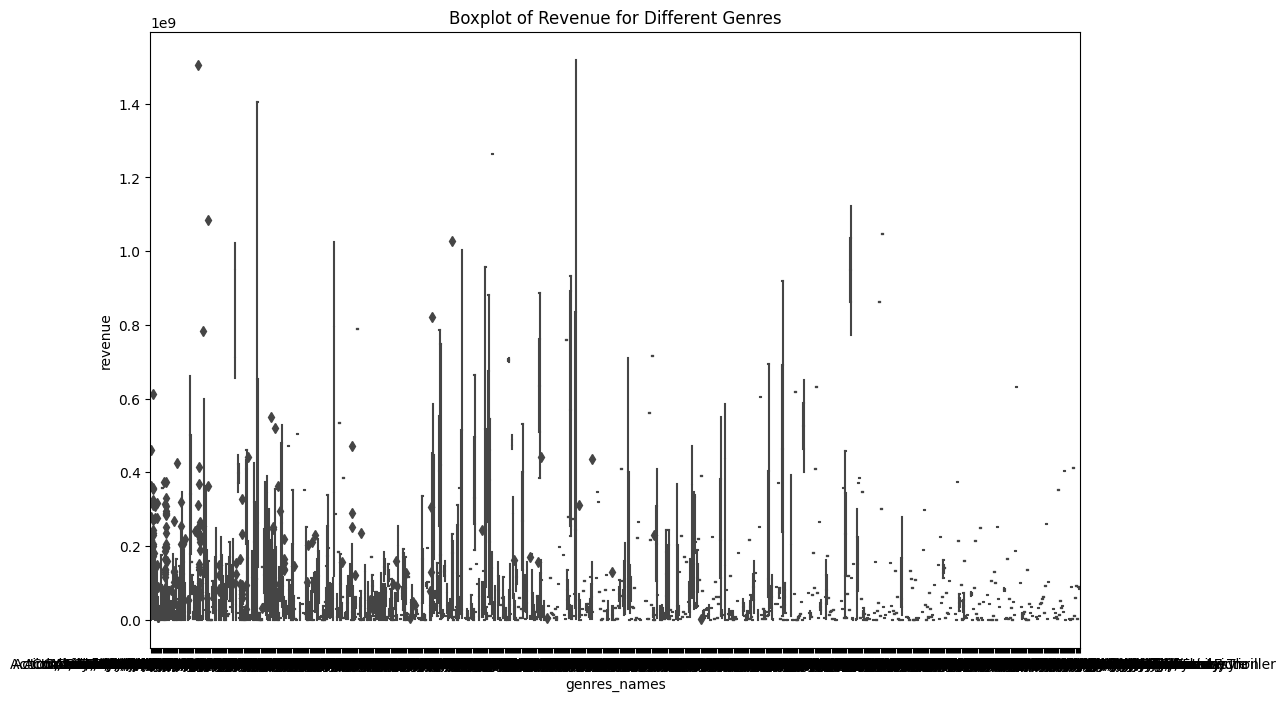

In [122]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres_names', y='revenue', data=train_df)
plt.title('Boxplot of Revenue for Different Genres')
plt.show()

In [ ]:
#Production companies

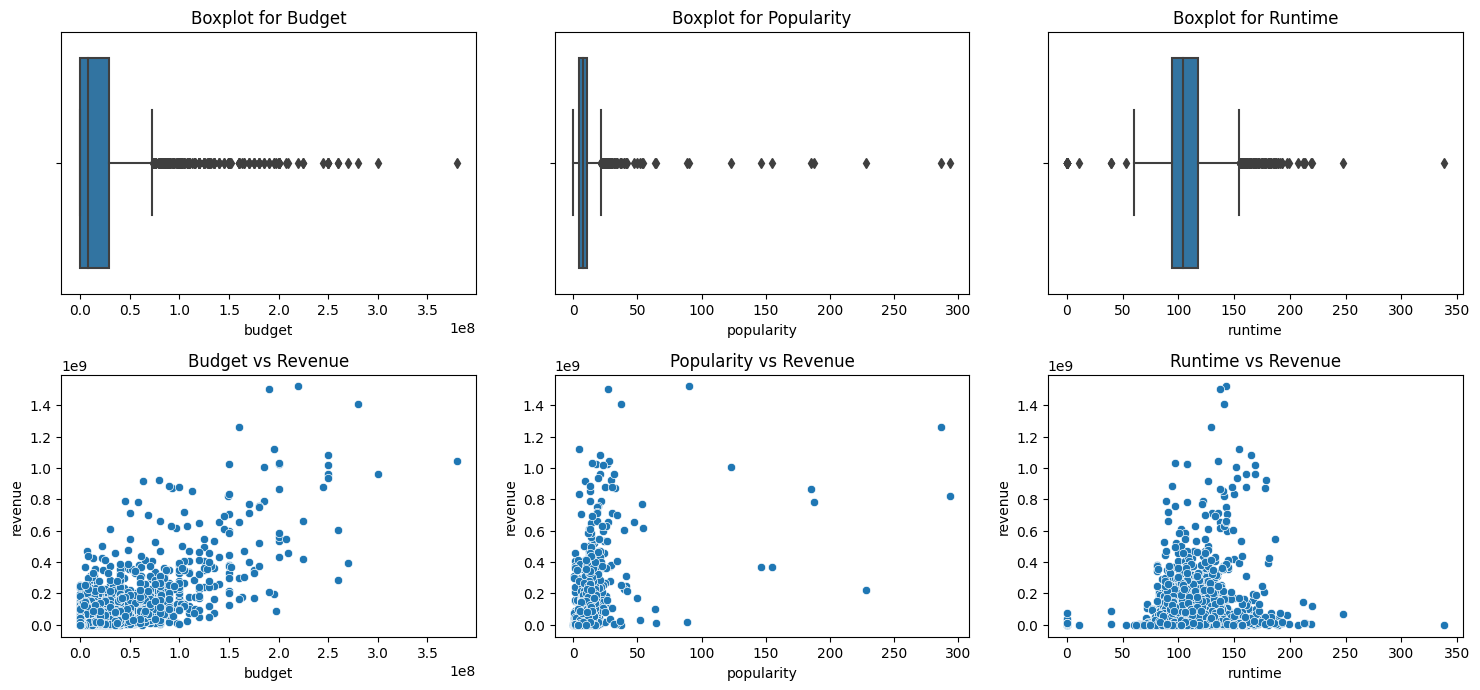

Text(0.5, 1.0, 'Correlation Matrix for Budget, Popularity, Runtime, and Revenue')

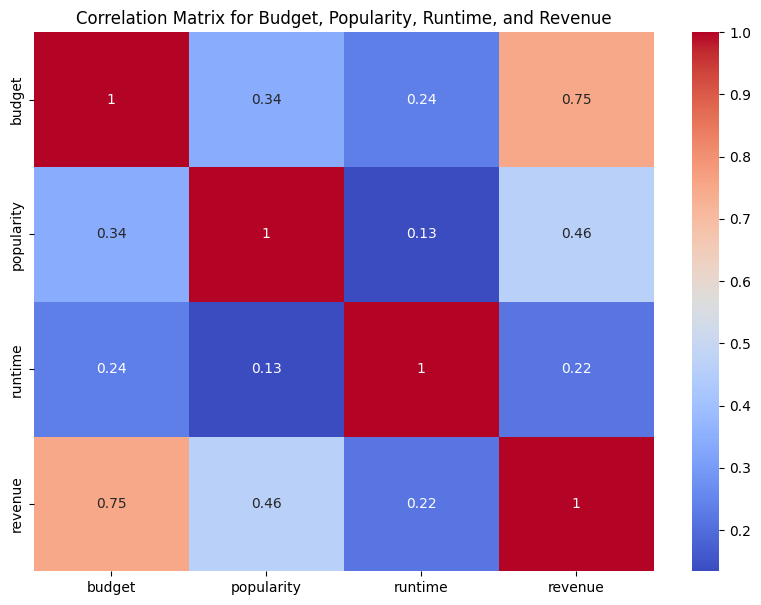

In [106]:
# 设置图的大小
plt.figure(figsize=(15, 10))

# 1. 箱线图
# Budget
plt.subplot(3, 3, 1)
sns.boxplot(x=train_df['budget'])
plt.title('Boxplot for Budget')

# Popularity
plt.subplot(3, 3, 2)
sns.boxplot(x=train_df['popularity'])
plt.title('Boxplot for Popularity')

# Runtime
plt.subplot(3, 3, 3)
sns.boxplot(x=train_df['runtime'])
plt.title('Boxplot for Runtime')

# 2. 散点图
# Budget vs Revenue
plt.subplot(3, 3, 4)
sns.scatterplot(x=train_df['budget'], y=train_df['revenue'])
plt.title('Budget vs Revenue')

# Popularity vs Revenue
plt.subplot(3, 3, 5)
sns.scatterplot(x=train_df['popularity'], y=train_df['revenue'])
plt.title('Popularity vs Revenue')

# Runtime vs Revenue
plt.subplot(3, 3, 6)
sns.scatterplot(x=train_df['runtime'], y=train_df['revenue'])
plt.title('Runtime vs Revenue')

# 调整子图的间距
plt.tight_layout()
plt.show()

# 4. 相关矩阵 & 热力图
corr_matrix = train_df[['budget', 'popularity', 'runtime', 'revenue']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Budget, Popularity, Runtime, and Revenue')

#budget 和 popularity比较重要，有相关性，其中budget更强
# #runtime在一定范围有较好的revenue，一旦过高或过低表现欠佳